In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
path = "/content/drive/MyDrive/ML_ВШЭ/"
train = pd.read_parquet(path+"train.parquet")
test = pd.read_parquet(path+"test.parquet")

In [3]:
train.head(5)

,id,prompt,response_a,response_b,winner,model_a,model_b,language
0,00007cff95d7f7974642a785aca248b0f26e60d3312fac...,vieš po Slovensky?,"Áno, hovorím po slovensky. Ako vám môžem pomôcť?","Áno, veď som tu! Môžem ti pomôcť s otázkami al...",model_a,o1-preview,reka-core-20240904,Slovak
1,00010ed04b536f56ebe43eef1100c13906abea12bf9855...,You will be given a piece of news. Analyze it ...,Let's break down the news and analyze it accor...,"```json\n{\n ""contains_orgs"": true,\n ""orgs""...",model_a,gemma-2-27b-it,gemini-1.5-flash-002,Russian
2,0003800d510e38803efba5ceaec122bc66408fe367b0be...,"Dört basamaklı, rakamları birbirinden ve sıfır...","Bu soruyu çözmek için, verilen koşulları adım ...",Bu problemi adım adım çözelim:\n\n1) ABCD - DC...,model_a,gpt-4-0125-preview,claude-3-5-sonnet-20240620,Turkish
3,00072026c68f5418ef2da238394e418ce72a534b9b22d5...,"현재 추천된 탑 3 종목인 Cabaletta Bio (CABA), Rocket Ph...","죄송하지만 저는 금융 조언을 제공할 수 없습니다. 저는 AI 모델이며, 투자 결정에...",현재 추천된 탑 3 종목에 순위를 매기기 위해서는 여러 가지 요소들을 고려해야 합니...,model_b,gemma-2-2b-it,llama-3.1-nemotron-70b-instruct,English
4,0007ce7cf6bc1b5a8f8a4669b854fb12030863c970d9dc...,Please be boring,"Alright, I'll be as boring as possible.\n\nTod...","Understood. Here is a straightforward, unadorn...",model_a,reka-flash-20240722,grok-2-2024-08-13,English


In [6]:
test.head(3)

,id,prompt,response_a,response_b,scored
0,327228,Caso Clínico: Un hombre de 70 años con anteced...,**Diagnóstico Diferencial de Anemia en Pacient...,"Basándonos en el caso clínico presentado, pode...",False
1,1139415,Peel Company received a cash dividend from a ...,The correct answer is **(a) No No**. Here's ...,The correct answer is **(a) No No**. Here's wh...,False
2,1235630,Há um grave problema com o relógio da torre da...,Dois problemas interessantes!\n\n**Problema 1:...,Vamos resolver os dois problemas em sequência....,False


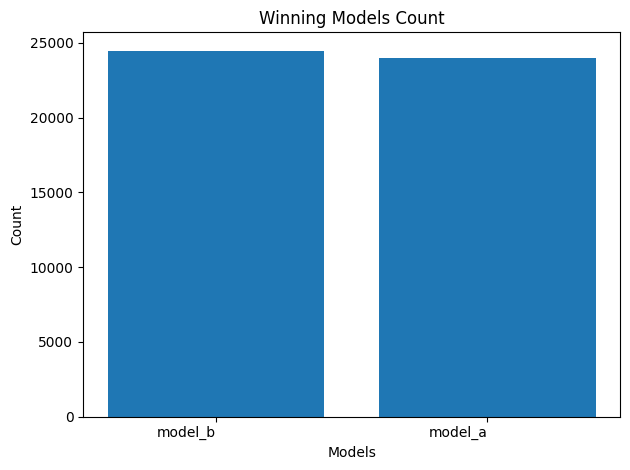

In [8]:
winner_count = train['winner'].value_counts()


plt.bar(winner_count.index, winner_count.values)
plt.xlabel('Models')
plt.ylabel('Count')
plt.title('Winning Models Count')
plt.xticks(ha='right')
plt.tight_layout()
plt.show()

In [9]:
winner_count

,count
winner,
model_b,24481
model_a,23958


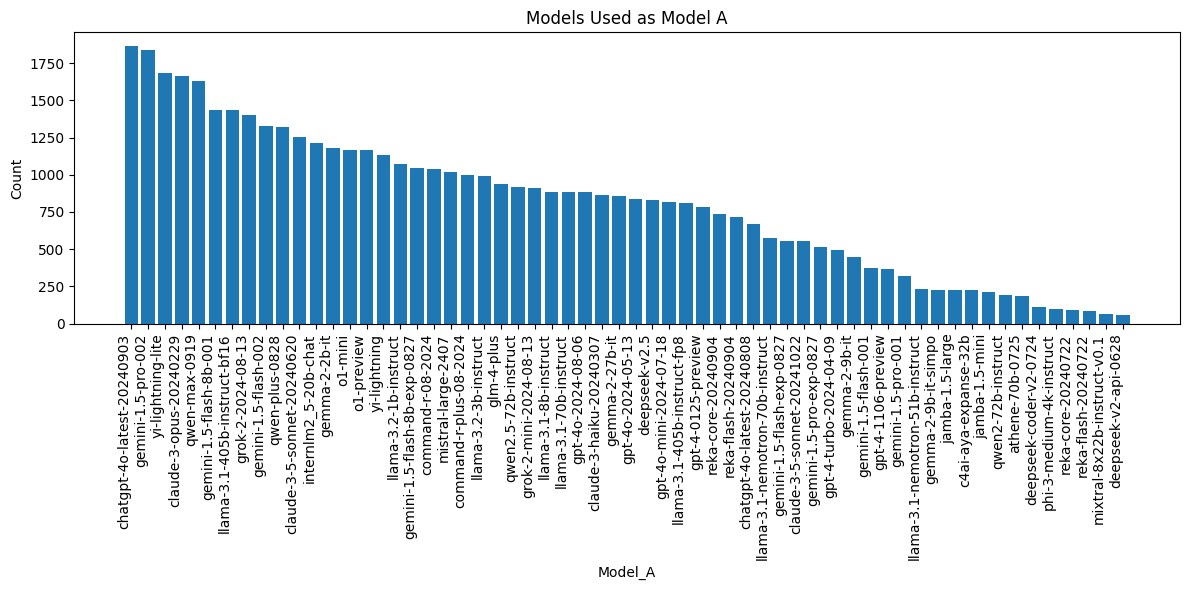

In [11]:
count_models_a = train['model_a'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(count_models_a.index, count_models_a.values)
plt.xlabel('Model_A')
plt.ylabel('Count')
plt.title('Models Used as Model A')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [13]:
count_models_a

,count
model_a,
chatgpt-4o-latest-20240903,1863
gemini-1.5-pro-002,1836
yi-lightning-lite,1681
claude-3-opus-20240229,1665
qwen-max-0919,1630
gemini-1.5-flash-8b-001,1436
llama-3.1-405b-instruct-bf16,1432
grok-2-2024-08-13,1401
gemini-1.5-flash-002,1329


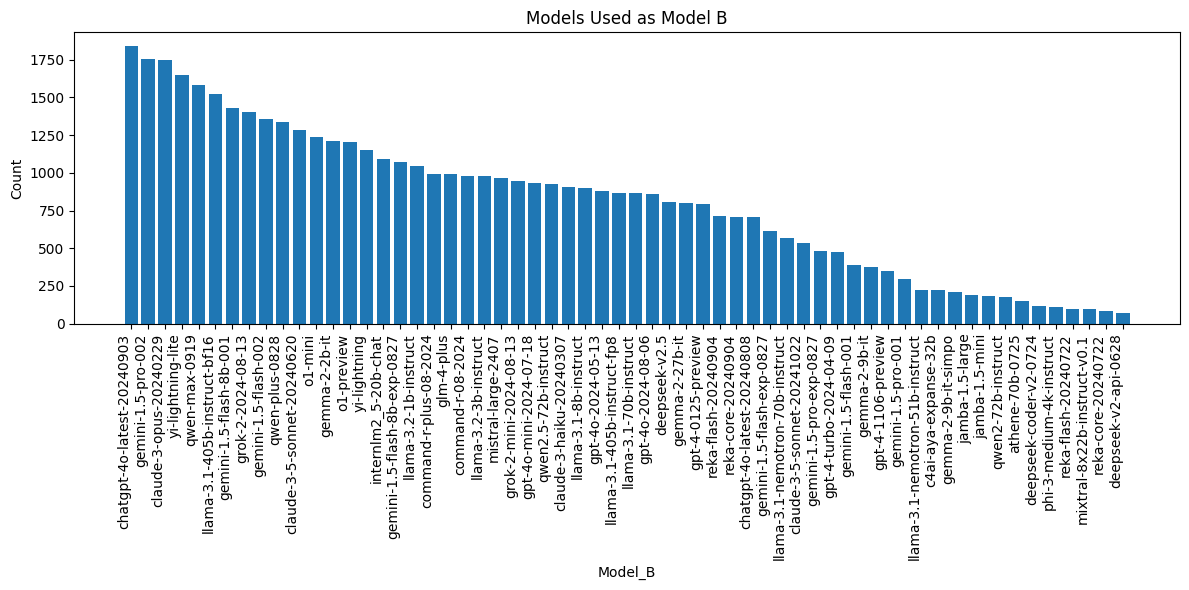

In [14]:
count_models_b = train['model_b'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(count_models_b.index, count_models_b.values)
plt.xlabel('Model_B')
plt.ylabel('Count')
plt.title('Models Used as Model B')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [15]:
count_models_b

,count
model_b,
chatgpt-4o-latest-20240903,1839
gemini-1.5-pro-002,1751
claude-3-opus-20240229,1748
yi-lightning-lite,1647
qwen-max-0919,1582
llama-3.1-405b-instruct-bf16,1519
gemini-1.5-flash-8b-001,1427
grok-2-2024-08-13,1405
gemini-1.5-flash-002,1357


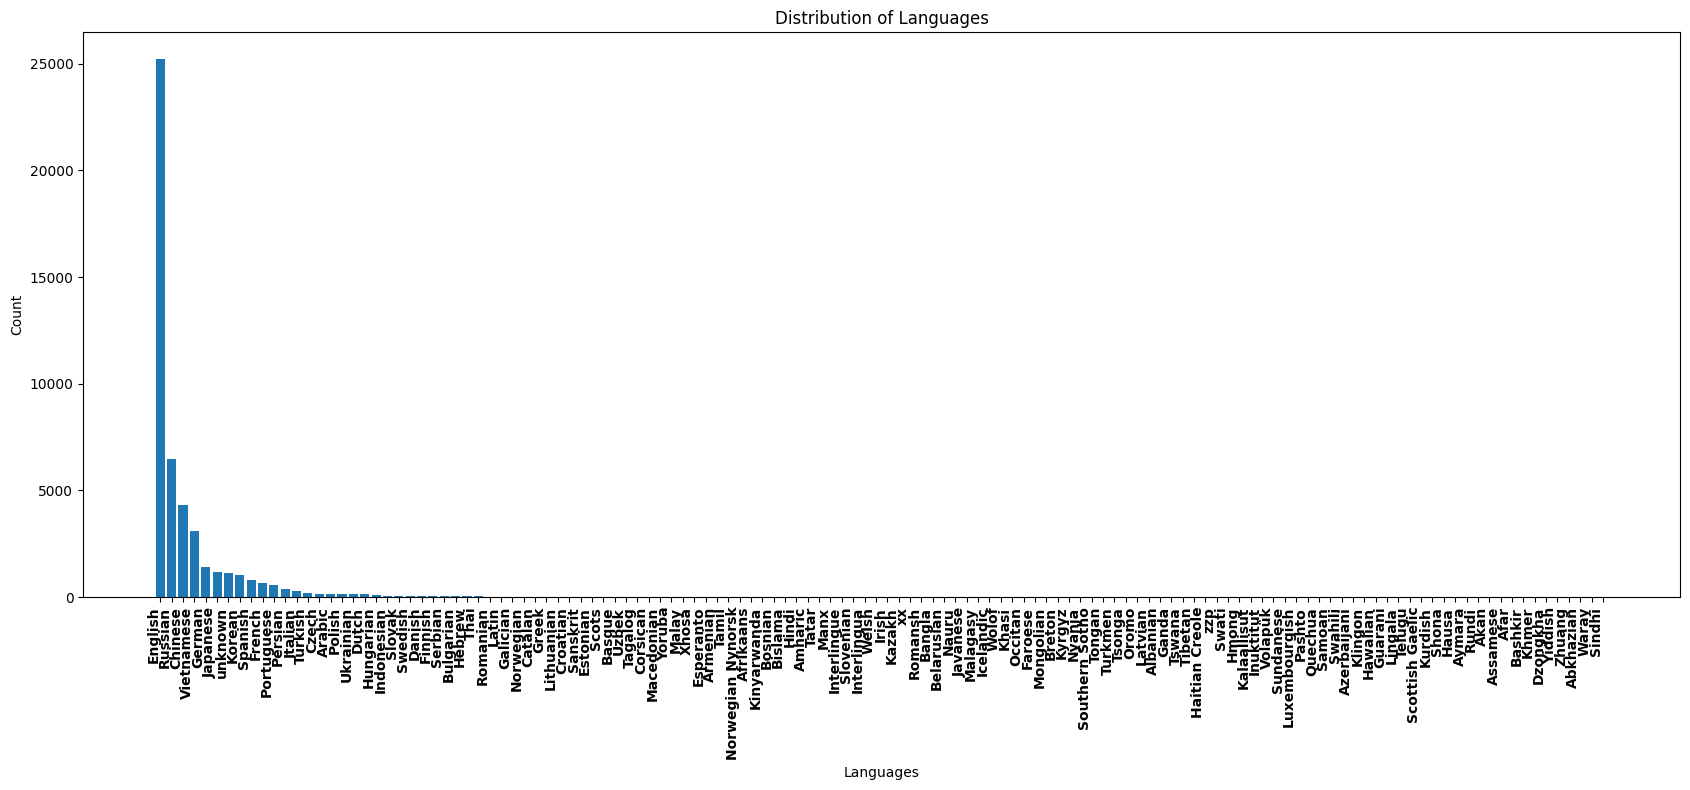

In [36]:
count_of_lang = train['language'].value_counts()

plt.figure(figsize=(17, 8))
plt.bar(count_of_lang.index, count_of_lang.values)
plt.xlabel('Languages')
plt.ylabel('Count')
plt.title('Distribution of Languages')
plt.xticks(rotation=90, ha='right', fontweight='bold')
plt.tight_layout()
plt.show()

In [17]:
count_of_lang

,count
language,
English,25211
Russian,6455
Chinese,4310
Vietnamese,3103
German,1402
...,...
Yiddish,1
Zhuang,1
Abkhazian,1


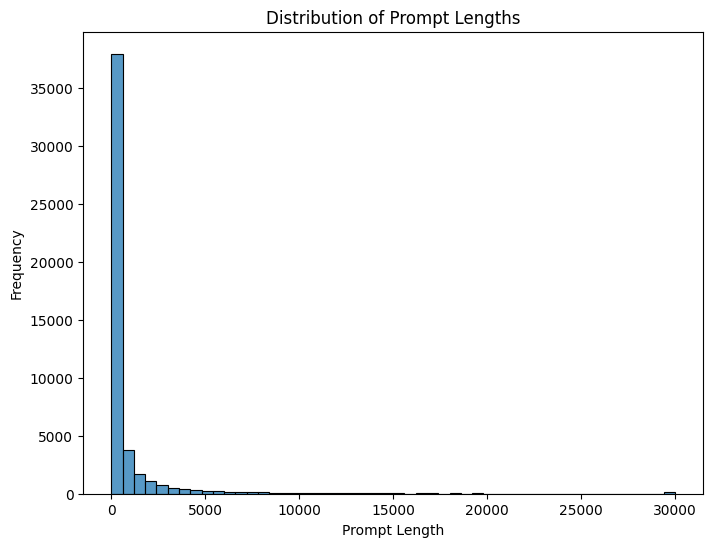

In [30]:
train['prompt_length'] = train['prompt'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(train['prompt_length'], bins=50)
plt.title('Distribution of Prompt Lengths')
plt.xlabel('Prompt Length')
plt.ylabel('Frequency')
plt.show()

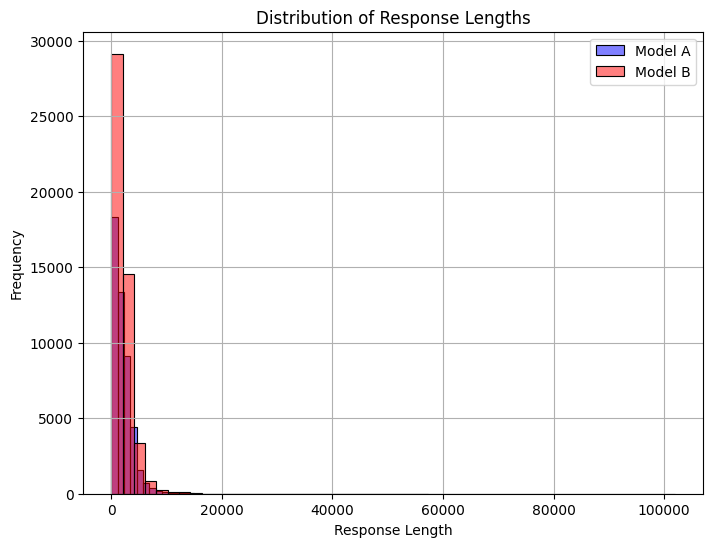

In [31]:
train['response_a_length'] = train['response_a'].apply(len)
train['response_b_length'] = train['response_b'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(train['response_a_length'], bins=50, label='Model A', color='blue', alpha=0.5)
sns.histplot(train['response_b_length'], bins=50, label='Model B', color='red', alpha=0.5)
plt.title('Distribution of Response Lengths')
plt.xlabel('Response Length')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

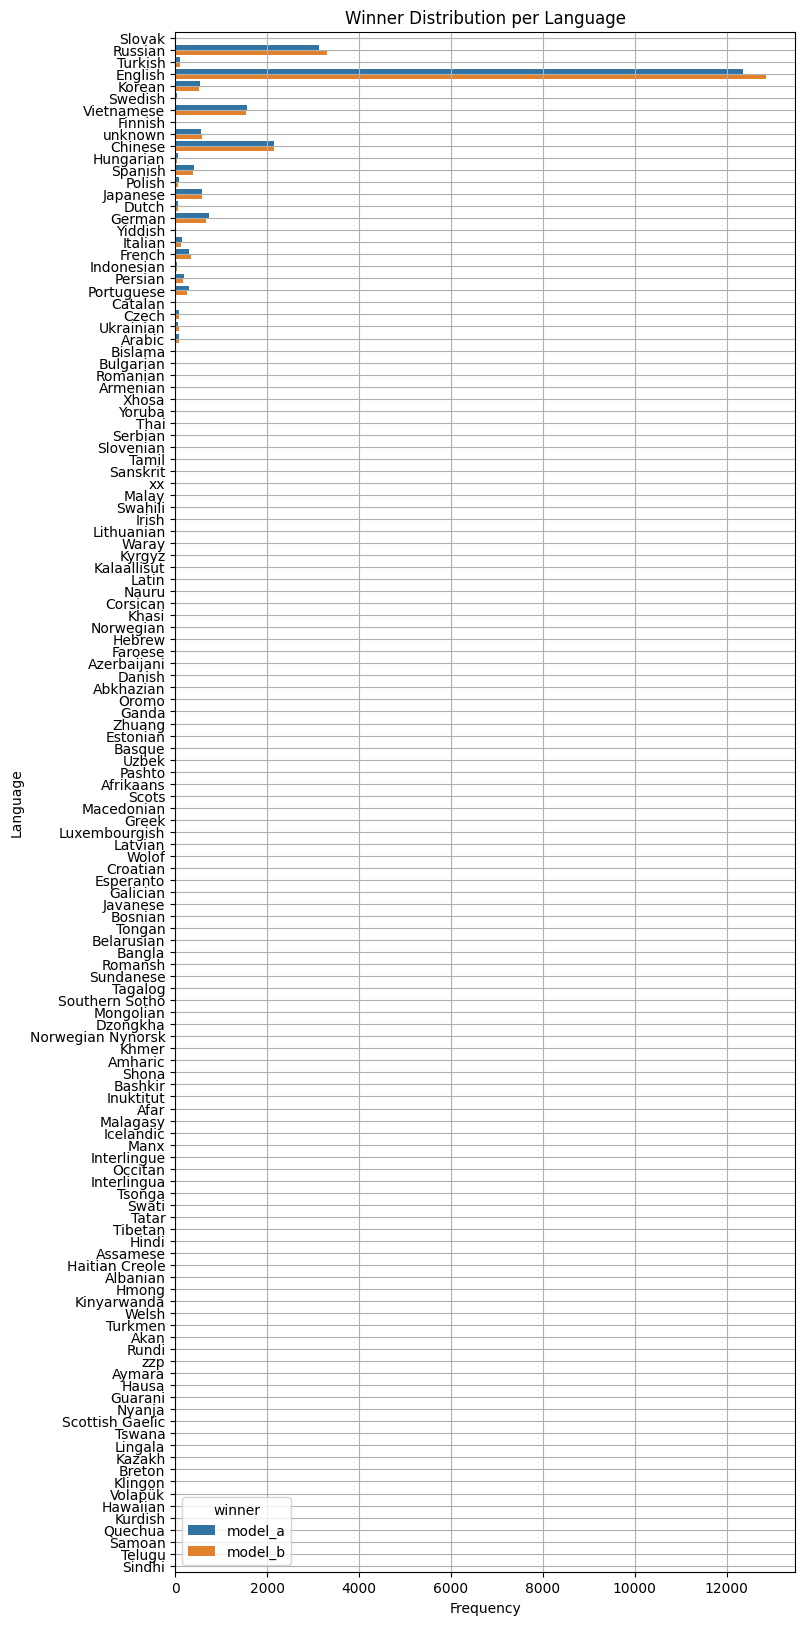

In [33]:
plt.figure(figsize=(8, 20))
sns.countplot(y='language', hue='winner', data=train)
plt.title('Winner Distribution per Language')
plt.xlabel('Frequency')
plt.ylabel('Language')
plt.grid()
plt.show()

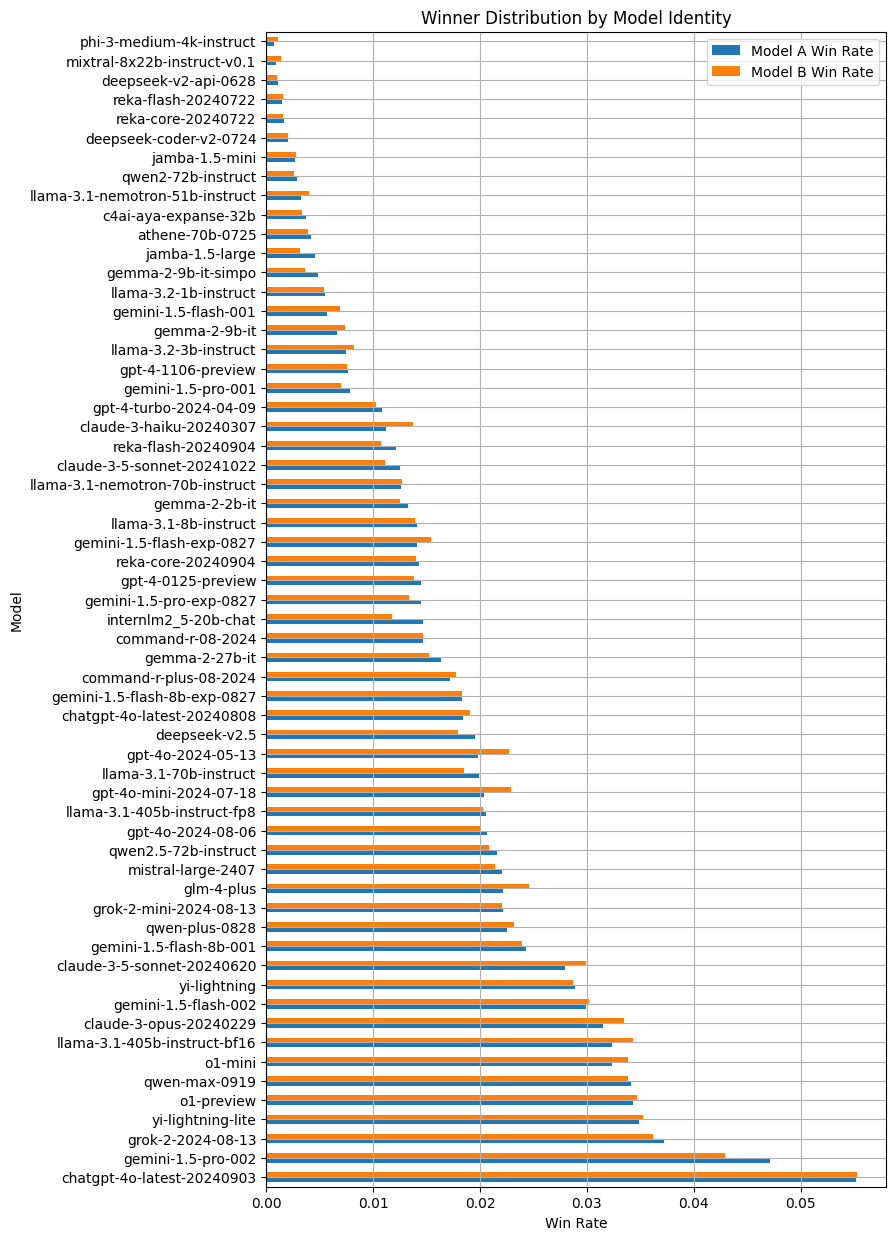

In [34]:
model_a_win_rate = train[train['winner'] == 'model_a']['model_a'].value_counts(normalize=True)
model_b_win_rate = train[train['winner'] == 'model_b']['model_b'].value_counts(normalize=True)

win_rates = pd.concat([model_a_win_rate, model_b_win_rate], axis=1)
win_rates.columns = ['Model A Win Rate', 'Model B Win Rate']

win_rates.plot(kind='barh', figsize=(8, 15))
plt.title('Winner Distribution by Model Identity')
plt.ylabel('Model')
plt.xlabel('Win Rate')
plt.grid()
plt.show()